# Artificial Intelligence Course - Fall 1402
## Computer Assignment #2 - Reinforcement Learning

##MOHAMMAD REZA MOHAMMAD HASHEMI<br><br>
###810100206

# Table of Contents

- [Part 1: Value Iteration & Policy Iteration Algorithms](#1)
    - [َQuestion 1:](#1-0)
    - [َQuestion 2:](#1-1)
    - [َQuestion 3:](#1-12)
    - [َQuestion 4:](#1-2)
    - [َQuestion 5:](#1-3)
        - [Value Iteration](#1-3-1)
        - [Policy Iteration](#1-3-2)
    - [َQuestion 6:](#1-4)
        - [Value Iteration](#1-4-1)
        - [Policy Iteration](#1-4-2)
- [Part 2: Q-Learning Algorithm](#2)
    - [َQuestion 8:](#2-1)
    - [َQuestion 9:](#2-2)
    - [َQuestion 10:](#2-3)

In [37]:
import sys
sys.path.append(r'c:\users\mmd\appdata\local\programs\python\python310\lib\site-packages')

In [38]:
# import
import numpy as np
import gym


<a name='1'></a>
## Part 1: Value Iteration & Policy Iteration Algorithms

In [39]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False , render_mode="human")

In [40]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
env.reset()
env.render()

you can see the environment in each step by render command :


In [41]:
# Total no. of states
env.observation_space.n

16

In [42]:
# Total no. of actions
env.action_space.n

4

<a name='1-0'></a>
### Question 1:

Value Iteration algorithm is one of the MDP method's which using to find the optimal value function and policy table for a MDP problem. We use Bellman equation to gradually improve the values that we found in each iteration for each state until it converges to optimal value function. We continue applying the Bellman equation iteratively until value function’s changes become very small or it does not change anymore (converge to optimal solution).
after converging to the optimal values we have the policy extraction phase using state value actions table to find the optimal policys for the agent actions .

<a name='1-1'></a>
### Question 2:

In [43]:
class ValueIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))

    def value_estimation(self):
        self.delta = np.inf

        while(self.delta > self.theta):

            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                for action in range(self.env.action_space.n):
                    action_value = 0
                    for probability, next_state, reward, done in self.env.P[state][action]:
                        ### START CODE HERE ###
                         action_value += probability*(reward + (self.discount_factor * self.state_values[next_state]))
                        ### END CODE HERE ###
                    self.q_values[state, action] = action_value

                self.state_values[state] = np.max(self.q_values[state,:])

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

                if (self.delta < self.theta):
                    break

    def take_action(self, action):
        next_state, reward, done, _ , _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return np.argmax(self.q_values[state,:])

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-12'></a>
### Question 3:

Value Iteration algorithm is one of the MDP method's which using to find the optimal value function and policy table for a MDP problem.This algorithem contains 4 steps in the first step named : Initialization Start with a random policy and an arbitrary value function.In the second step named : Policy Evaluation we update all state values for that iteration fixed policy using Bellman eqation Then scince we use a fixed policy in each iteration its needed to update the policy to a better version in the third step named called Policy Improvement .And finally in the last step named Policy Stability Check if during the 3rd step the policy haven't changed the algorithem finds out that this policy is the optimal policy .

<a name='1-2'></a>
### Question 4:

In [44]:
class PolicyIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.policy = np.random.randint(self.env.action_space.n, size=self.env.observation_space.n) # initial policy
        self.policy_stable = False

    def policy_evaluation(self):
        self.delta = np.inf

        while(self.delta >= self.theta):

            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                new_state_value = 0
                for probability, next_state, reward, done in self.env.P[state][self.policy[state]]:
                    ### START CODE HERE ###
                    new_state_value += probability * (reward + self.discount_factor * self.state_values[next_state])
                    ### END CODE HERE ###
                self.state_values[state] = new_state_value

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

    def policy_improvement(self):
        self.policy_stable = True

        for state in range(self.env.observation_space.n):
            old_policy = self.policy[state]

            for action in range(self.env.action_space.n):

                action_value = 0
                for probability, next_state, reward, done in self.env.P[state][action]:
                    ### START CODE HERE ###
                    action_value += probability * (reward + self.discount_factor * self.state_values[next_state])
                    ### END CODE HERE ###
                self.q_values[state, action] = action_value

            self.policy[state] = np.argmax(self.q_values[state,:])

            if old_policy != self.policy[state]:
                self.policy_stable = False

    def policy_estimation(self):
        self.policy_stable = False

        while not self.policy_stable:
            self.policy_evaluation()
            self.policy_improvement()

    def take_action(self, action):
        next_state, reward, done, _ , _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return self.policy[state]

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-3'></a>
### Question 5:

<a name='1-3-1'></a>
#### Value Iteration:

In [45]:
def convert_to_arrow(direction):
    output = ""
    if (direction == 0):
        output = "\u2190"
    elif (direction == 1):
        output = "\u2193"
    elif (direction == 2):
        output = "\u2192"
    else:
        output = "\u2191"
    return output

val_it = ValueIteration(env , 0.9)
val_it.reset()
val_it.value_estimation()
states_values = val_it.get_state_values();
print ("Optimal values :")
for i in range(0 , 4):
    print ("\n-------------------------------------------------\n|" , end ="")
    for j in range(0 , 4):
        print (f"{states_values[4*i+j]:.4f}" + "|" , end = "")
print ("\n-------------------------------------------------\n")
print ("Optimal policy :")
for i in range(0 , 4):
    print ("\n-------------------------------------------------\n|" , end ="")
    for j in range(0 , 4):
        print (convert_to_arrow(val_it.get_optimal_policy(4*i+j)) + "|" , end = "")
print ("\n-------------------------------------------------\n")
print ("Q-values :")
print (val_it.get_q_values())
is_done = False
current_state = 0
action = val_it.get_optimal_policy(0);
while (not(is_done)):
    result = val_it.take_action(action)
    new_state = result[0]
    new_state_reward = result[1]  
    is_done = result[2]
    action = val_it.get_optimal_policy(new_state)


Optimal values :

-------------------------------------------------
|0.5905|0.6561|0.7290|0.6561|
-------------------------------------------------
|0.6561|0.1329|0.8100|0.1329|
-------------------------------------------------
|0.7290|0.8100|0.9000|0.1329|
-------------------------------------------------
|0.1329|0.9000|1.0000|0.0000|
-------------------------------------------------

Optimal policy :

-------------------------------------------------
|↓|→|↓|←|
-------------------------------------------------
|↓|←|↓|←|
-------------------------------------------------
|→|↓|↓|←|
-------------------------------------------------
|←|→|→|←|
-------------------------------------------------

Q-values :
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.13286025 0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.13286025 0.59049    0.59049   ]
 [0.59049    0.6561     0.13286025 0.531441  ]
 [0.13286025 0.13286025 0.13286025 0.13286025]
 [0.11957

<a name='1-3-2'></a>
#### Policy Iteration:

In [46]:
pol_it = PolicyIteration(env , 0.9)
pol_it.reset()
pol_it.policy_estimation()
print ("Optimal values :")
for i in range(0 , 4):
    print ("\n-------------------------------------------------\n|" , end ="")
    for j in range(0 , 4):
        print (f"{states_values[4*i+j]:.4f}" + "|" , end = "")
print ("\n-------------------------------------------------\n")
print ("Optimal policy :")
for i in range(0 , 4):
    print ("\n-------------------------------------------------\n|" , end ="")
    for j in range(0 , 4):
        print (convert_to_arrow(pol_it.get_optimal_policy(4*i+j)) + "|" , end = "")
print ("\n-------------------------------------------------\n")
print ("Q-values :")
print (pol_it.get_q_values())
is_done = False
current_state = 0
action = pol_it.get_optimal_policy(0);
while (not(is_done)):
    result = pol_it.take_action(action)
    new_state = result[0]
    new_state_reward = result[1]  
    is_done = result[2]
    action = pol_it.get_optimal_policy(new_state)


Optimal values :

-------------------------------------------------
|0.5905|0.6561|0.7290|0.6561|
-------------------------------------------------
|0.6561|0.1329|0.8100|0.1329|
-------------------------------------------------
|0.7290|0.8100|0.9000|0.1329|
-------------------------------------------------
|0.1329|0.9000|1.0000|0.0000|
-------------------------------------------------

Optimal policy :

-------------------------------------------------
|↓|→|↓|←|
-------------------------------------------------
|↓|←|↓|←|
-------------------------------------------------
|→|↓|↓|←|
-------------------------------------------------
|←|→|→|←|
-------------------------------------------------

Q-values :
[[5.31441000e-01 5.90490000e-01 5.90490000e-01 5.31441000e-01]
 [5.31441000e-01 2.24536249e-08 6.56100000e-01 5.90490000e-01]
 [5.90490000e-01 7.29000000e-01 5.90490000e-01 6.56100000e-01]
 [6.56100000e-01 2.24536249e-08 5.90490000e-01 5.90490000e-01]
 [5.90490000e-01 6.56100000e-01 2.24536

<a name='1-4'></a>
### Question 6:

<a name='1-4-1'></a>
#### Value Iteration:

In [47]:
import time
whole_time = 0
for i in range(0 , 100) :
    starting_time = time.time()
    val_it = ValueIteration(env , 0.9)
    val_it.reset()
    val_it.value_estimation()
    finish_time = time.time()
    whole_time += finish_time - starting_time
print (whole_time/100)

0.5009684181213379


<a name='1-4-2'></a>
#### Policy Iteration:

In [48]:
whole_time = 0
for i in range(0 , 100) :
    starting_time = time.time()
    pol_it = PolicyIteration(env , 0.9)
    pol_it.reset()
    pol_it.policy_estimation()
    finish_time = time.time()
    whole_time += finish_time - starting_time
print (whole_time/100)
env.close()

0.5012043356895447


Convergency speed : According to the results of the code boxes above, it can be seen that there is not so much difference between these two methods in the convergence speed of the solution, but in general policy Iteration often converges in fewer iterations than Value Iteration. However, each iteration in Policy Iteration can be more computationally expensive because it involves policy evaluation for all states1. On the other hand, Value Iteration may take more iterations to converge, but each iteration can be less computationally expensive.<br>
so we need to choose the better algorithem knowing the problem situation and rules and see which one of less iteration by more time per each iteration and more iteration and less time per iteration wins in that special problem.<br>
The optimal policy of both algorithem is the same policy but for the states values there is a difference that the policy iteration do not value the wholes becuase it evalueate using the fixed policys and do not have any option ever to get out of the wholes but for the value iteration the wholes using the neighbor states and get a little value.

<a name='2'></a>
## Part 2: Q-Learning Algorithm

<a name='2-1'></a>
### Question 7:

Q-learning is a reinforcement learning (RL) algorithm that help us to determine the best action for an agent within a given environment. Q-learning os a model-free algorithm ,meaning that it does not require a model of the environment to learn. Q-learning is off-policy, meaning that it can learn the optimal policy independent of the policy being followed.At first we initialize the Q-table, then we observe the current state (S), next we select an action a from S using an exploration policy, next we take action a and observe the new state S' and receive reward r and finaly we update the Q-value of the state-action pair (S, a) using the Bellman equation then repeat this process untill it converges to optimal solution.

In [49]:
# hyperparameters
REPS = 20
EPISODES = 2000
EPSILON = 0.1
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 206

In [50]:
# environment
env = gym.make('Taxi-v3' )
Initial_State = env.reset(seed = STUDENT_NUM)
Initial_State

(428, {'prob': 1.0, 'action_mask': array([0, 1, 1, 0, 0, 0], dtype=int8)})

In [51]:
taxi_row, taxi_col, pass_idx, dest_idx = env.decode(Initial_State[0])
taxi_row, taxi_col, pass_idx, dest_idx

(4, 1, 2, 0)

In [58]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
env.render()
env.close()

you can see the environment in each step by render command :


In [ ]:
# Total no. of states
env.observation_space.n

500

In [ ]:
# Total no. of actions
env.action_space.n

6

<a name='2-1'></a>
### Question 8:

In [59]:
import random
class QLearningAgent():
    def __init__(self, env, epsilon, learning_rate, discount_factor, seed):
      self.env = env
      self.epsilon = epsilon
      self.learning_rate = 0.2
      self.olr = 0.2
      self.discount_factor = discount_factor
      self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
      self.seed = seed
      self.states = env.observation_space.n

    def choose_action(self, state):
      random_number = random.uniform(0 , 1)
      action = 0
      if random_number > self.epsilon:
        action = np.argmax(self.q_table[state])
      else:
        action = random.randint(0 , 5)
      return action

    def update_q_table(self, state, action, nextState, reward):
      ### START CODE HERE ###
      # Calculate the new Q-value using the Q-learning formula
      prev_val = self.q_table[state][action]
      learning_val = self.learning_rate * ((reward + (self.discount_factor * max(self.q_table[nextState]))) - self.q_table[state][action])
      self.q_table[state][action] = prev_val + learning_val
      ### END CODE HERE ###

    def decay_epsilon(self, episode):
      ### START CODE HERE ###
      dec_rate = 0.99
      self.epsilon = self.epsilon*(dec_rate**episode)
      ### END CODE HERE ###

    def decrease_learning_rate(self, episode):
      ### START CODE HERE ###
      learningRateDecrease = 0.004
      self.learning_rate = self.learning_rate - (learningRateDecrease*(1/(episode+1)))
      ### END CODE HERE ###

    def take_action(self, action):
      next_state, reward, done, _, _ = self.env.step(action)
      return next_state, reward, done

    def get_optimal_policy(self, state):
      return np.argmax(self.q_table[state])

    def get_q_values(self):
      return self.q_table

    def reset(self):
      self.learning_rate = self.olr
      return self.env.reset(seed=self.seed)
    
    def change_env(self , _env):
      self.env = _env

<a name='2-2'></a>
### Question 9:

the fixed learning rate agent got mean reward of last 20 episodes : 7.899999999999999and the deacresing agent got : 8.3


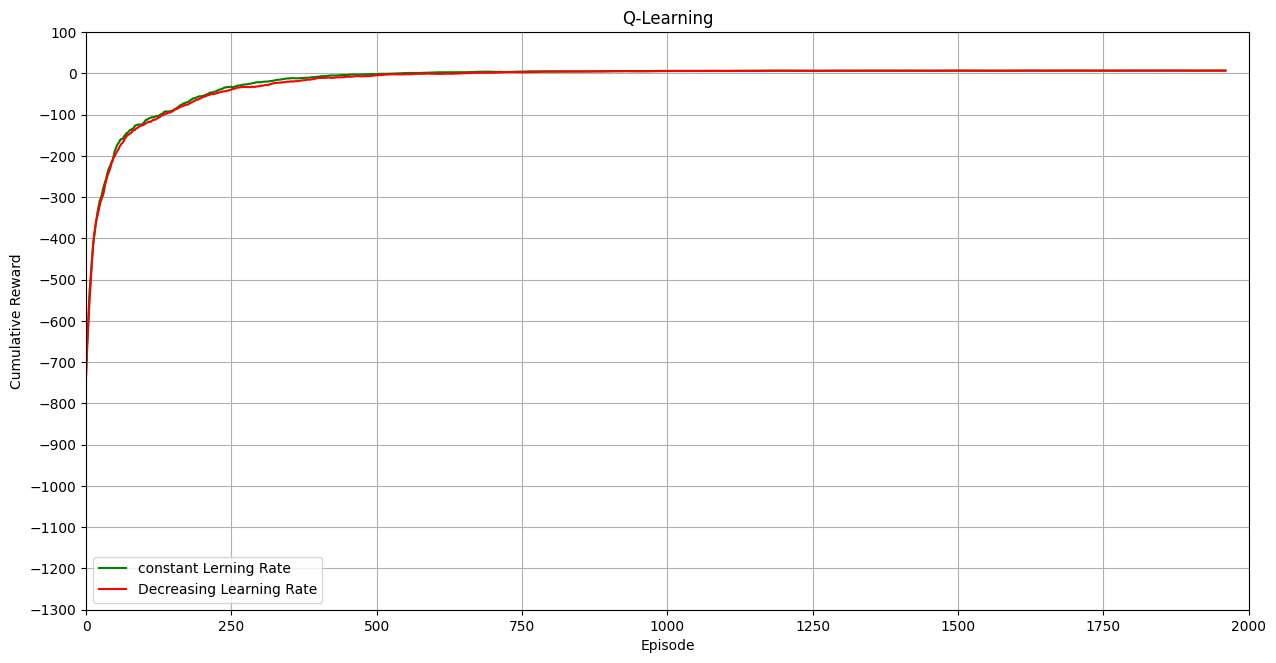

In [74]:
import matplotlib.pyplot as plt
import copy

def train_agents(env, is_learning_decresing ):
    best_agent_reward = 0
    best_agent_converging_steps_mean = 0
    best_agent = QLearningAgent(env,EPSILON,LEARNING_RATE,DISCOUNT,STUDENT_NUM)
    average_rewards = np.zeros(EPISODES)
    for rep in range(REPS):
        agent = QLearningAgent(env,EPSILON,LEARNING_RATE,DISCOUNT,STUDENT_NUM)
        last_20_rewards_mean = 0
        last_20_converging_steps_mean = 0
        for episode in range(EPISODES):
            ep_reward = 0
            Initial_state = env.reset()
            state = initialState[0]
            done = False
            converging_steps = 0
            while(not done):
                converging_steps += 1
                action = agent.choose_action(state)
                nextState,reward,done = agent.take_action(action)
                agent.update_q_table(state,action,nextState,reward)
                state = nextState
                ep_reward += reward
            agent.decay_epsilon(episode)
            average_rewards[episode] += ep_reward/REPS
            if is_learning_decresing :
                agent.decrease_learning_rate(episode)
            if episode >= 1980 :
                last_20_rewards_mean += ep_reward/20
                last_20_converging_steps_mean += converging_steps/20

        if best_agent_reward < last_20_rewards_mean :
            best_agent = copy.deepcopy(agent)
            best_agent_reward = last_20_rewards_mean
            best_agent_converging_steps_mean = last_20_converging_steps_mean
            best_agent = agent
            
    return best_agent_reward, best_agent, best_agent_converging_steps_mean , average_rewards


env = gym.make('Taxi-v3' , render_mode="rgb_array")
initialState = env.reset(seed=STUDENT_NUM)


best_agent_reward = 0
best_agent_q_table = np.zeros(env.observation_space.n)
best_agent_converging_steps_mean = 0
best_d_agent_reward = 0
best_d_agent_q_table = np.zeros(env.observation_space.n)
best_d_agent_converging_steps_mean = 0
best_agent_reward, best_agent, best_agent_converging_steps_mean , average_rewards = train_agents(env, False )
best_d_agent_reward, best_d_agent, best_d_agent_converging_steps_mean , average_d_rewards  = train_agents(env, True )

print ("the fixed learning rate agent got mean reward of last 20 episodes : " + str(best_agent_reward) + "and the deacresing agent got : " + str(best_d_agent_reward))


def move_avg(data, win_size):
    return np.convolve(data, np.ones(win_size)/win_size, mode='valid')

plt.figure(figsize=(15,7.5))
plt.plot(move_avg(average_rewards, 40), color='green', label="constant Lerning Rate")
plt.plot(move_avg(average_d_rewards, 40), color='red', label="Decreasing Learning Rate")
plt.ylim(-1200, 100) 
plt.yticks(range(-1300, 101, 100))
plt.xlim(0, 2000)
plt.xticks(range(0, 2001, 250))
plt.grid(True)
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Q-Learning")
plt.legend()
plt.show()



I reduce the epsilon value using an exponential function that can be seen in section 8. The reason is that in the first episodes we need the randomness of the algorithm to be high so that the agent can explore the space and different parts of the map. to learn, and as it moves towards the last episodes, this amount of exploration of the agent will decrease, and the reason for choosing the exponential function is to obtain a relatively acceptable speed in reducing the epsilon, so that the agent has an acceptable opportunity to learn from its explored spaces. Due to the low epsilon reduction speed, we reduce the opportunity to learn the good parts of the states and weaken the agent's learning.<br>
But in order to reduce the learning rate, I used a function with a slower change and in the form of 1/x because we want the agent to use its previous knowledge better as it moves forward, but we prefer to give the agent enough learning opportunities to be able to learn after Exploring the space enough to have enough opportunities to learn from the explored spaces, and in the last episodes, finally reach the most logical policies with the lowest learning rate.<br>
Also, in terms of convergence to the optimal solution, as can be seen, it is expected that the algorithm with a decreasing learning rate will perform better, although considering the size of our problem and the selected parameters for it, this difference is not so evident and the desired result is sometimes not achieved. It is also due to the randomness in process explorer and learning agents.<br>
Also, in terms of speed of convergence to the optimal solution, it is expected that the algorithm with decreasing learning rate will perform better and faster, but according to our fixed parameters in this problem and the randomness in the algorithm, sometimes this happens and sometimes it does not happen.


<a name='2-3'></a>
### Question 10:

In [75]:
def show_policy(agent , new_env):
    agent.change_env(new_env)
    Initial_state = new_env.reset(seed = STUDENT_NUM)
    state = initialState[0]
    done = False
    while(not done):
        action = agent.choose_action(state)
        nextState,reward,done = agent.take_action(action)
        state = nextState

def train_more_40_episodes(agent , env):
    agent.change_env(new_env)
    mean_reward = 0 
    for i in range (0 , 40):
        ep_reward = 0
        Initial_state = env.reset()
        state = initialState[0]
        done = False
        while(not done):
            action = agent.choose_action(state)
            nextState,reward,done = agent.take_action(action)
            agent.update_q_table(state,action,nextState,reward)
            state = nextState
            ep_reward += reward
        agent.decay_epsilon(i)
        mean_reward += ep_reward/40
    
    print (mean_reward)
        

new_env = gym.make('Taxi-v3' , render_mode = "human")

if best_agent_reward > best_d_agent_reward :
    show_policy(best_agent , new_env)
    train_more_40_episodes(best_agent , env)
else :
    show_policy(best_d_agent , new_env)
    train_more_40_episodes(best_d_agent , env)




6.549999999999999


c:\users\mmd\appdata\local\programs\python\python310\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
